# Testing the kinematic feature extraction code on Modelled Data

### Step 0: Make the modelled data
### Step 1: Plot and visualized what the expected results of modelled data are
### Step 2: Run the kinematic extraction code on the modelled data 
### Step 3: Plot the extracted kinematics for the modelled data
### Step 4: comapred the expectation and the results and make sure kinematic code works fine

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from cv2 import VideoWriter, VideoWriter_fourcc
import pandas as pd
#import torch
from scipy import signal, ndimage, spatial
from scipy.signal import correlate
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter
import math 
#from signal_alignment import phase_align, chisqr_align
from scipy.interpolate import interp1d
import scipy.stats as stats
from scipy.stats import spearmanr
from plot_kinematics_basic import plot_kinematics 
from feature_eng import StrokeMetrics, ALSMetrics, ClinicalMetrics, ClinicalSignals

import get_onsets_basic

### Step 0: Make the modelled data

In [3]:
# CREATING A MODEL LOOKUP TABLE 
input_csv = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/Test_Table.csv"
out_path = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling"
csv_name = "model_lookup.csv"

model_lookup = pd.DataFrame()
from_example = pd.read_csv(input_csv)

try:
    from_example = from_example.drop(['Unnamed: 0'], axis=1)
    from_example.loc[0][['landmarks']] = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_landmarksFiltered3D.csv"
    from_example.loc[0][['landmarks_table']] = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_video.Table"
    from_example.loc[0][['rest']] = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_RST_REST_landmarksFiltered3D.csv"
except:
    pass


from_example.to_csv(os.path.join(out_path, csv_name))

In [4]:
# CREATING A MODEL REST csv
input_csv = r"/Users/denizjafari/documents/CODE/ClinicalScore/FaceData_/video_data/ALS/old/A001/landmarks_finetuned_w15/A001_02_RST_REST_landmarksFiltered3D.csv"
out_path = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling"
csv_name = "NF000_02_RST_REST_landmarksFiltered3D.csv"


    

from_example = pd.read_csv(input_csv)
from_example = from_example.drop(['Unnamed: 0'], axis=1)
cols = from_example.columns
model_landmarks = pd.DataFrame(columns= cols)

model_landmarks['Video_Frame_number'] = np.array(range(100))+1
model_landmarks.loc[0] = from_example.loc[100].astype(np.float)
model_landmarks.loc[0, 'Video_Frame_number'] = 1
#model_landmarks.loc[0, 'Time_Stamp (s)'] = 0

#model_landmarks = model_landmarks['Video_Frame_number'].append(np.array(range(100))+2, ignore_index = True ) 
#model_landmarks.loc[1:100,'Video_Frame_number'] = np.array(range(99))+2
# sampling freq of 10 per second 
model_landmarks['Time_Stamp (s)'] = np.array(range(100))/50

model_landmarks = model_landmarks.fillna(model_landmarks.loc[0])

# initialize all the landmark poses to zero 
#model_landmarks[new_cols] = 1

model_landmarks.to_csv(os.path.join(out_path, csv_name))

#os.path.join(out_path, csv_name)



print('save at location:', os.path.join(out_path, csv_name))


save at location: /Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_RST_REST_landmarksFiltered3D.csv


In [5]:
# CREATING A MODEL Task Landmarks csv
#input_csv = r"/Users/denizjafari/documents/CODE/ClinicalScore/FaceData_/video_data/ALS/old/A001/landmarks_finetuned_w15/A001_02_NSM_OPEN_landmarksFiltered3D.csv"
out_path = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling"
csv_name = "NF000_02_BBP_NORMAL_landmarksFiltered3D.csv"


    



# model the opening: which is based on using landmarks [51 and 57]

# initialize x and z components to 1, and 

#model_landmarks['landmark_51'] = 1
#model_landmarks['landmark_57'] = 1

#model_landmarks['landmark_51.2'] = 1
#model_landmarks['landmark_57.2'] = 1

model_landmarks['landmark_57.1'] = model_landmarks['landmark_57.1'].values + (2*np.cos(np.linspace(-np.pi, 3*np.pi, 100))+2) #+ np.cos(np.linspace(-np.pi, 3*np.pi, 100)*20)
#model_landmarks['landmark_51.1'] = 1

# model the spread: which is based on using landmarks [48 and 54]

#model_landmarks['landmark_48'] = 1
model_landmarks['landmark_54'] = model_landmarks['landmark_54'].values + (2*np.cos(np.linspace(-np.pi, 3*np.pi, 100))+2) #+ np.cos(np.linspace(-np.pi, 3*np.pi, 100)*20)

#model_landmarks['landmark_48.1'] = 1
#model_landmarks['landmark_54.1'] = 1

#model_landmarks['landmark_48.2'] = 1
#model_landmarks['landmark_54.2'] = 1


# model the distance from eye corners: which is based on using landmarks [42, 54], [39, 48]



# model the mouth left and right areas: which is based on using landmarks [48 and 54]
model_landmarks.to_csv(os.path.join(out_path, csv_name))

print('save at location:', os.path.join(out_path, csv_name))

save at location: /Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_landmarksFiltered3D.csv


### Generating cosine signal 

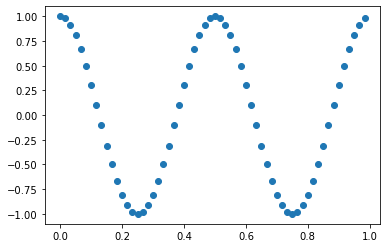

60

In [6]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 60  # Hertz
DURATION = 1  # Seconds

def generate_cosine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.cos((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_cosine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y,'o')
plt.show()
len(x)

In [7]:
a = model_landmarks['landmark_54'].values
#a = a + np.cos(np.linspace(-np.pi, 3*np.pi, 100)) + np.cos(np.linspace(-np.pi, 3*np.pi, 100)*20)



100
3.9989930847663686


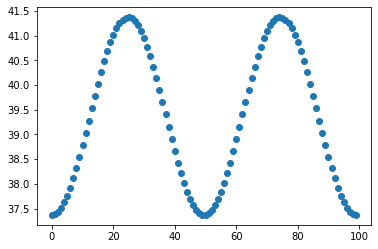

In [23]:

plt.plot(model_landmarks['landmark_54'].values, 'o')
print(len(model_landmarks['landmark_54'].values))

print(model_landmarks['landmark_54'].values.max() - model_landmarks['landmark_54'].values.min())

### Filters 



In [9]:
def create_filter(time_stamps, highcut, filter_order):
    
    
    fs = int(1 / (time_stamps[1] - time_stamps[0]))
    print(fs)
    nyq = 0.5 * fs
    high = highcut / nyq
    print(high)
    b, a = signal.butter(filter_order, high, btype='low', output='ba')
    return np.array([b, a])

In [10]:
# cut off freq 
cf = 12.5
# number of poles
p = 4
[b,a] = create_filter(model_landmarks['Time_Stamp (s)'].to_numpy(), cf, p)
#f_vertical = signal.filtfilt(b, a, model_landmarks['landmark_54'].values)

50
0.5


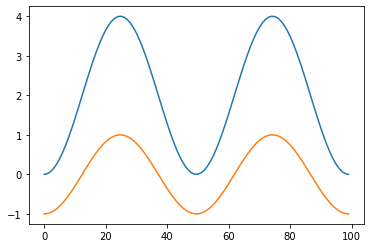

In [11]:
#x= np.array(range(100))* np.pi / 180.
x = np.linspace(-np.pi, 3*np.pi, 100)
plt.plot((2*np.cos(x)+2))
#plt.plot(x)



plt.plot(np.cos(np.linspace(-np.pi, 3*np.pi, 100)))

In [12]:
# Some helper functions

# Used to extract the patient type from the landmark file name
ids = {
    "stroke": ["OP", "S"],
    "healthy": ["N"],
    "als": ["A"]
}

# Defines which metric calculator to use based on the 'metric_type' argument
metric_calc_map = {
    "orofacial_features": ClinicalMetrics,
    "orofacial_signals": ClinicalSignals
}


def compute_metrics(inputs, out_path, metrics_type = 'orofacial_features'):
    """
    Computes the metrics for every file in the data csv
    :param inputs: A dataframe with columns: csv_path, rep_{}_start,
                                                       rep_{}_end
    :param out_path: A path to a csv to store the metric data in
    """
    # Key is task name and value is all repetitions of the task
    metric_frames: Dict[str, List[pd.DataFrame]] = {}
    for index, row in inputs.iterrows():
        # Read all data from the input dataframe
        try:
            data_path = row['csv_path']
            rest_path = row['rest_path']
            data_frame = pd.read_csv(data_path)
            rest_frame = pd.read_csv(rest_path)
            task_type = row['task']
            subject_id = row['subject']
            subject_type = row['type']
        except KeyError:
            raise KeyError("Input csv must contain 'csv_path', 'rest_path', 'rest_table_path' \
            'task', 'subject', and 'type' columns. \nFurthermore, 'csv_path' \
            and 'rest_path' must be files on the disk.")
        print("Starting:", data_path, "with", subject_type, "patients")
        rep_ranges = []
        rep_i = 1
        # Grab data about the start and end of repetitions
        while f"rep_{rep_i}_start" in row and f"rep_{rep_i}_end" in row:
            try:
                start_val = row[f"rep_{rep_i}_start"]
                end_val = row[f"rep_{rep_i}_end"]
                rep_ranges.append(range(int(start_val), int(end_val)))
            except ValueError as e:
                pass
            rep_i += 1
        rep_i -= 1

        # Calculate metrics
        metric_calc = metric_calc_map[metrics_type](data_frame, rest_frame)

        metric_frame = None
        for rep_range in rep_ranges:
            metrics = metric_calc.compute_metrics(active_frames=rep_range)
            print()
            print(metrics)
            print()
            if metric_frame is None:
                metric_frame = metrics
            else:
                metric_frame = pd.concat([metric_frame, metrics], ignore_index=True)
        rep_nums = list(range(1, rep_i+1))

        # Insert metadata to final csv
        metric_frame.insert(0, 'rep', pd.Series(rep_nums))
        metric_frame.insert(0, 'type', pd.Series(np.full(rep_i, int(not(subject_type == "healthy")))))
        metric_frame.insert(0, 'task', pd.Series(np.full(rep_i, task_type)))
        metric_frame.insert(0, 'subject_id', pd.Series(np.full(rep_i, subject_id)))
        try:
            metric_frames[task_type].append(metric_frame)
        except KeyError:
            metric_frames[task_type] = [metric_frame]

    # save data to disk
    for task, metrics in metric_frames.items():
        csv_name = "{}_metric_output_{}.csv".format(metrics_type,task)
        
        all_metrics_frame = pd.concat(metrics, ignore_index=True)

        
        if not os.path.exists(out_path):
            os.makedirs(out_path)
        all_metrics_frame.to_csv(os.path.join(out_path, csv_name))
        
    print(f"Saved metrics to {os.path.abspath(out_path)}")
    return metric_frames



def compute_signals(inputs, out_path, metrics_type = 'orofacial_signals'):
    """
    Computes the metrics for every file in the data csv
    :param inputs: A dataframe with columns: csv_path, rep_{}_start,
                                                       rep_{}_end
    :param out_path: A path to a csv to store the metric data in
    """
    # Key is task name and value is all repetitions of the task
    metric_frames: Dict[str, List[pd.DataFrame]] = {}
    for index, row in inputs.iterrows():
        # Read all data from the input dataframe
        try:
            data_path = row['csv_path']
            rest_path = row['rest_path']
            data_frame = pd.read_csv(data_path)
            rest_frame = pd.read_csv(rest_path)
            task_type = row['task']
            subject_id = row['subject']
            subject_type = row['type']
        except KeyError:
            raise KeyError("Input csv must contain 'csv_path', 'rest_path', 'rest_table_path' \
            'task', 'subject', and 'type' columns. \nFurthermore, 'csv_path' \
            and 'rest_path' must be files on the disk.")
        print("Starting:", data_path, "with", subject_type, "patients")
        rep_ranges = []
        rep_i = 1
        # Grab data about the start and end of repetitions
        while f"rep_{rep_i}_start" in row and f"rep_{rep_i}_end" in row:
            try:
                start_val = row[f"rep_{rep_i}_start"]
                end_val = row[f"rep_{rep_i}_end"]
                rep_ranges.append(range(int(start_val), int(end_val)))
            except ValueError as e:
                pass
            rep_i += 1
        rep_i -= 1

        # Calculate metrics
        metric_calc = metric_calc_map[metrics_type](data_frame, rest_frame)

        metric_frame = None
        
        for rep_range in rep_ranges:
            
            metrics = metric_calc.compute_metrics(active_frames=rep_range)
            
            metrics.insert(0, 'Time_Stamp', data_frame.loc[rep_range]['Time_Stamp (s)'].values)
            metrics.insert(0, 'type', pd.Series(np.full(len(metrics), int(not(subject_type == "healthy")))))
            metrics.insert(0, 'task', pd.Series(np.full(len(metrics), task_type)))
            metrics.insert(0, 'rep', pd.Series(np.full(len(metrics), rep_ranges.index(rep_range))))
            metrics.insert(0, 'subject_id', pd.Series(np.full(len(metrics), subject_id)))
            
            
            if metric_frame is None:
                metric_frame = metrics
            else:
                metric_frame = pd.concat([metric_frame, metrics], ignore_index=True)
      

        # Insert metadata to final csv
        
        
        
        try:
            metric_frames[task_type].append(metric_frame)
        except KeyError:
            metric_frames[task_type] = [metric_frame]

    # save data to disk
    for task, metrics in metric_frames.items():
        csv_name = "{}_metric_output_{}.csv".format(metrics_type,task)
        
        all_metrics_frame = pd.concat(metrics, ignore_index=True)

        
        if not os.path.exists(out_path):
            os.makedirs(out_path)
        all_metrics_frame.to_csv(os.path.join(out_path, csv_name))
        
    print(f"Saved metrics to {os.path.abspath(out_path)}")
    return metric_frames




In [13]:
def save_results(input_csv, output_folder, metric_type):
    analysis_csv = pd.DataFrame()
    files = pd.read_csv(input_csv)
    for i, row in files.iterrows():
        # Construct a dataframe with the information necessary for processing
        landmark_path = os.path.abspath(row["landmarks"])
        landmark_file_name = os.path.basename(landmark_path)
        table_path = os.path.abspath(row["landmarks_table"])
        table_file_name = os.path.basename(table_path)
        rest_path = os.path.abspath(row["rest"])
        rest_file_name = os.path.basename(table_path)
        print(landmark_path)
        print()
        print(rest_path)
        print()
        print(table_path)

        if not os.path.isfile(landmark_path):
            raise RuntimeError("Landmark path is not a file on disk")
        if not os.path.isfile(rest_path):
            raise RuntimeError("Rest file is not a file on disk")
        if not os.path.isfile(table_path):
            raise RuntimeError("Table file is not a file on disk")

        landmark_file_data = landmark_file_name.split("_")
        subject = landmark_file_data[0]
        subject_type = ""
        # Check if a user fits into a known subject type
        for s_type, prefixes in ids.items():
            for prefix in prefixes:
                if prefix in subject:
                    subject_type = s_type
        task = "_".join(landmark_file_data[2:4])
        parsed_data = pd.DataFrame(columns=["csv_path", "type", "rest_path", "subject", "task"])
        parsed_data.loc[0] = 0

        
     
        video_info = pd.read_csv(table_path)


        parsed_data["csv_path"] = landmark_path
        parsed_data["rest_path"] = rest_path
        parsed_data["type"] = subject_type
        parsed_data["subject"] = subject
        parsed_data["task"] = task
        for index, row in video_info.iterrows():
            parsed_data[f"rep_{index+1}_start"] = row[video_info.columns[0]]
            parsed_data[f"rep_{index+1}_end"] = row[video_info.columns[-1]] 
        analysis_csv = analysis_csv.append(parsed_data, ignore_index=True, sort=False)


    if metric_type == 'orofacial_signals':
        compute_signals(analysis_csv, output_folder,metric_type);
        
    else:
        compute_metrics(analysis_csv, output_folder,metric_type);

In [14]:
# Try with mini lookup table of 1 modelled data

metric_type = 'orofacial_signals' 

 #csv file with modelled fake landmarks info and the made up .TABLE info
input_csv = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/model_lookup.csv"
#where to store the results
output_folder = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling" 
save_results(input_csv, output_folder, metric_type)




/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_landmarksFiltered3D.csv

/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_RST_REST_landmarksFiltered3D.csv

/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_video.Table
Starting: /Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_landmarksFiltered3D.csv with healthy patients
active features in eval_feature
[10.30774979 10.30774979 10.38048616 10.48082572 10.60728707 10.75798268
 10.93063594 11.12260556 11.33091805 11.55230848 11.78326912 12.02010497
 12.25899486 12.49605656 12.72741418 12.94926621 13.15795258 13.35001929
 13.52227934 13.67186874 13.79629669 13.89348904 13.96182433 13.98479473
 13.98479473 13.98479473 13.93134665 13.84840964 13.73736776 13.60007284
 13.43881234 13.25626952 13.05547654 12.83976124 12.61268851 12.37799742
 12.13953515 11.90118926 11.666819

/Users/denizjafari/Documents/CODE/ClinicalScore/ClinicalScore/feature_eng.py:400: RuntimeWarning: invalid value encountered in true_divide
  z_scores = (feature - mean) / sd


active features in eval_feature
[53.96006998 53.96006998 54.03840601 54.14631001 54.28204933 54.44344401
 54.62790158 54.83245844 55.05382724 55.28844956 55.5325529  55.78221124
 56.03340814 56.28210132 56.52428775 56.75606821 56.97371015 57.17370799
 57.35283974 57.50821909 57.63734208 57.73812764 57.80895127 57.83275117
 57.83275117 57.83275117 57.77736763 57.69138962 57.57620303 57.43366443
 57.26607096 57.07612324 56.86688159 56.64171664 56.40425476 56.15831957
 55.90787018 55.65693736 55.40955861 55.16971317 54.94125804 54.72786606
 54.53296699 54.35969256 54.21082639 54.08875946 53.99545199 53.93240213
 53.93240213 53.93240213 53.93240213 53.99545199 54.08875946 54.21082639
 54.35969256 54.53296699 54.72786606 54.94125804 55.16971317 55.40955861
 55.65693736 55.90787018 56.15831957 56.40425476 56.64171664 56.86688159
 57.07612324 57.26607096 57.43366443 57.57620303 57.69138962 57.77736763
 57.83275117 57.83275117 57.83275117 57.80895127 57.73812764 57.63734208
 57.50821909 57.352

Saved metrics to /Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling


In [15]:
metric_type = 'orofacial_features' 

 #csv file with modelled fake landmarks info and the made up .TABLE info
input_csv = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/model_lookup.csv"
#where to store the results
output_folder = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling"
save_results(input_csv, output_folder, metric_type)


/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_landmarksFiltered3D.csv

/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_RST_REST_landmarksFiltered3D.csv

/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_video.Table
Starting: /Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_landmarksFiltered3D.csv with healthy patients
active features in eval_feature
[10.30774979 10.30774979 10.38048616 10.48082572 10.60728707 10.75798268
 10.93063594 11.12260556 11.33091805 11.55230848 11.78326912 12.02010497
 12.25899486 12.49605656 12.72741418 12.94926621 13.15795258 13.35001929
 13.52227934 13.67186874 13.79629669 13.89348904 13.96182433 13.98479473
 13.98479473 13.98479473 13.93134665 13.84840964 13.73736776 13.60007284
 13.43881234 13.25626952 13.05547654 12.83976124 12.61268851 12.37799742
 12.13953515 11.90118926 11.666819

active features in eval_feature
[55.73194778 55.73194778 55.77448778 55.83321307 55.90729826 55.99569047
 56.09711692 56.21009541 56.3329483  56.4638204  56.60070106 56.74145066
 56.88383137 57.02554184 57.16425539 57.29766078 57.42350485 57.5396357
 57.64404552 57.73491155 57.81063434 57.86987183 57.91156844 57.92559322
 57.92559322 57.92559322 57.89296685 57.84238674 57.77475613 57.69127713
 57.59342446 57.48291378 57.36166535 57.23176429 57.09541854 56.95491568
 56.81257991 56.6707302  56.53164071 56.39750426 56.27039958 56.15226262
 56.04486229 55.94978049 55.86839623 55.80187345 55.75115207 55.7169417
 55.7169417  55.7169417  55.7169417  55.75115207 55.80187345 55.86839623
 55.94978049 56.04486229 56.15226262 56.27039958 56.39750426 56.53164071
 56.6707302  56.81257991 56.95491568 57.09541854 57.23176429 57.36166535
 57.48291378 57.59342446 57.69127713 57.77475613 57.84238674 57.89296685
 57.92559322 57.92559322 57.92559322 57.91156844 57.86987183 57.81063434
 57.73491155 57.64404

//anaconda3/envs/ClinicalScore36/lib/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/denizjafari/Documents/CODE/ClinicalScore/ClinicalScore/feature_eng.py:400: RuntimeWarning: invalid value encountered in true_divide
  z_scores = (feature - mean) / sd


active features in eval_feature
[55.73194778 55.73194778 55.77448778 55.83321307 55.90729826 55.99569047
 56.09711692 56.21009541 56.3329483  56.4638204  56.60070106 56.74145066
 56.88383137 57.02554184 57.16425539 57.29766078 57.42350485 57.5396357
 57.64404552 57.73491155 57.81063434 57.86987183 57.91156844 57.92559322
 57.92559322 57.92559322 57.89296685 57.84238674 57.77475613 57.69127713
 57.59342446 57.48291378 57.36166535 57.23176429 57.09541854 56.95491568
 56.81257991 56.6707302  56.53164071 56.39750426 56.27039958 56.15226262
 56.04486229 55.94978049 55.86839623 55.80187345 55.75115207 55.7169417
 55.7169417  55.7169417  55.7169417  55.75115207 55.80187345 55.86839623
 55.94978049 56.04486229 56.15226262 56.27039958 56.39750426 56.53164071
 56.6707302  56.81257991 56.95491568 57.09541854 57.23176429 57.36166535
 57.48291378 57.59342446 57.69127713 57.77475613 57.84238674 57.89296685
 57.92559322 57.92559322 57.92559322 57.91156844 57.86987183 57.81063434
 57.73491155 57.64404

//anaconda3/envs/ClinicalScore36/lib/python3.6/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
//anaconda3/envs/ClinicalScore36/lib/python3.6/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [16]:
modelled_signal = np.cos(np.linspace(-np.pi, 3*np.pi, 100))+1

#print(modelled_signal)


### Extracted features

In [17]:
# reading the data

input_csv_features = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/orofacial_features_metric_output_BBP_NORMAL.csv"
input_csv_signals = r"/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/orofacial_signals_metric_output_BBP_NORMAL.csv"
input_csv_landmarks = r'/Users/denizjafari/documents/CODE/ClinicalScore/ClinicalScore/DataModeling/NF000_02_BBP_NORMAL_landmarksFiltered3D.csv'

df_mf = pd.read_csv(input_csv_features)
df_ms = pd.read_csv(input_csv_signals)
df_ml = pd.read_csv(input_csv_landmarks)
df_mf.head()

,Unnamed: 0,subject_id,task,type,rep,O_MAX,O_MIN,O_AVG,O_RANGE,O_PATH,...,tJA_RANGE,rJA_Max,rJA_MIN,rJA_AVG,rJA_RANGE,lJA_Max,lJA_MIN,lJA_AVG,lJA_RANGE,JA_diff
0,0,NF000,BBP_NORMAL,0,1,3.735875,0.033162,1.852950,3.702713,92.647502,...,122.655030,5.684342e-14,5.684342e-14,5.684342e-14,0.0,123.608815,0.953785,59.624318,122.655030,59.624318
1,1,NF000,BBP_NORMAL,0,2,3.735875,0.014761,1.888814,3.721114,92.551870,...,123.184711,5.684342e-14,5.684342e-14,5.684342e-14,0.0,123.608815,0.424103,60.784941,123.184711,60.784941


In [18]:
print(df_mf.O_MAX[0], modelled_signal.max())
print(df_mf.O_MIN[0], modelled_signal.min())


3.735874850899268 1.9994965423831852
0.03316198750273003 0.0


### Creating Animation and plots

In [ ]:
ax, figure = plt.subplots(figsize=(14,10))
plt.plot(df_ml['O'],'o')
plt.xlabel('Frames')
plt.ylabel('Range of Motion (cm)')

3.721113907383088


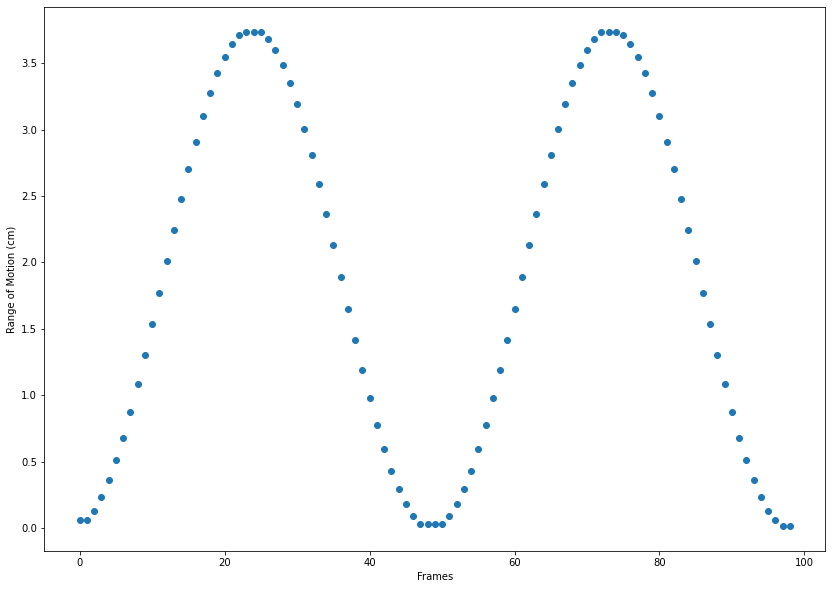

In [24]:
ax, figure = plt.subplots(figsize=(14,10))
plt.plot(df_ms['O'],'o')
plt.xlabel('Frames')
plt.ylabel('Range of Motion (cm)')


print(df_ms['O'].values.max() - df_ms['O'].values.min())

Text(0, 0.5, 'Range of Motion (cm)')

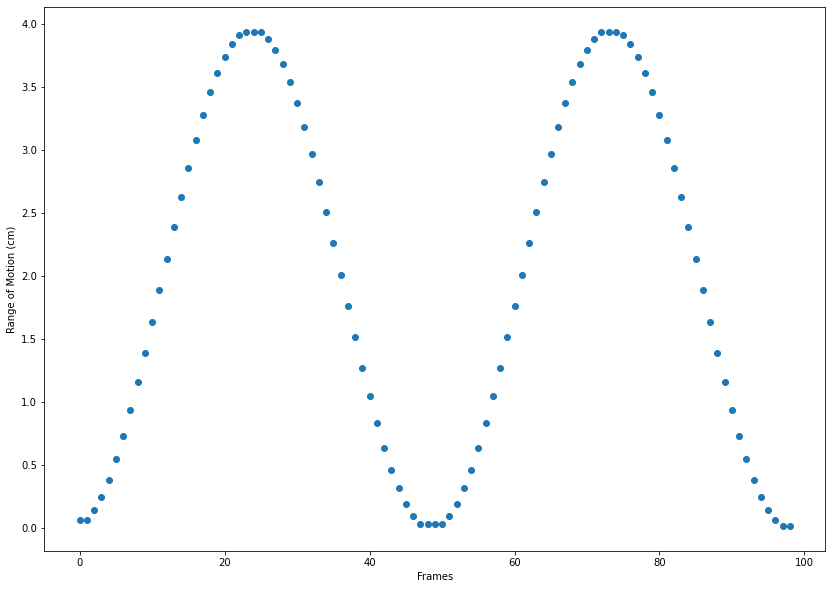

In [20]:
ax, figure = plt.subplots(figsize=(14,10))
plt.plot(df_ms['W'],'o')
plt.xlabel('Frames')
plt.ylabel('Range of Motion (cm)')